In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, accuracy_score, recall_score, precision_score, balanced_accuracy_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
import seaborn as sns

#load data from CSV file
data = pd.read_csv("/Users/catherinebetancourt-lee/BMEN 415/fetal_health.csv.csv")

#Merging classification classes into binary 
data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)

#Separate data and target variables
X = data.drop('fetal_health', axis = 1)
y = data['fetal_health']

#split model into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)






In [6]:
# Train the model
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)

# Tune hyperparameters
params = {'var_smoothing': [0.1, 1, 10]}
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['var_smoothing']



In [7]:
# Evaluate the model
y_pred = clf.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)

# Improve the model
selector = SelectKBest(k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
clf2 = GaussianNB(var_smoothing=best_alpha)
clf2.fit(X_train_selected, y_train)
y_pred2 = clf2.predict(X_test_selected)

#metrics
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred2)
print("F1 Score", f1)
balanced_acc = balanced_accuracy_score(y_test, y_pred2)
print("Balanced Accuracy:", balanced_acc)
recall = recall_score(y_test, y_pred2)
print("Recall Score:", recall)
precision = precision_score(y_test, y_pred2)
print("Precision Score:", precision)
auc = roc_auc_score(y_test, y_pred2)
print("AUC Score:", auc)
cm = confusion_matrix(y_test, y_pred2)
print("Confusion matrix:")
print(cm)
print(classification_report(y_test, y_pred2))

Accuracy: 0.9507042253521126
F1 Score 0.6557377049180327
Balanced Accuracy: 0.7780416514431859
Recall Score: 0.5714285714285714
Precision Score: 0.7692307692307693
AUC Score: 0.7780416514431859
Confusion matrix:
[[385   6]
 [ 15  20]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       391
           1       0.77      0.57      0.66        35

    accuracy                           0.95       426
   macro avg       0.87      0.78      0.81       426
weighted avg       0.95      0.95      0.95       426



0.931924882629108


/Users/catherinebetancourt-lee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


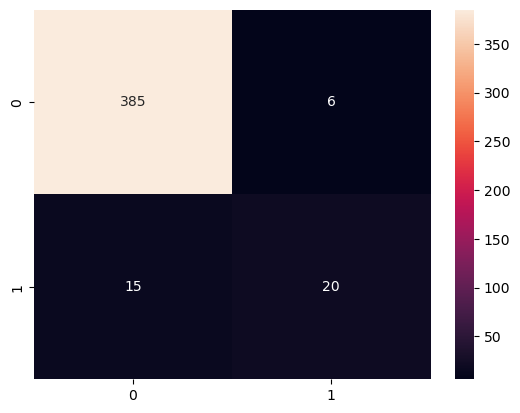

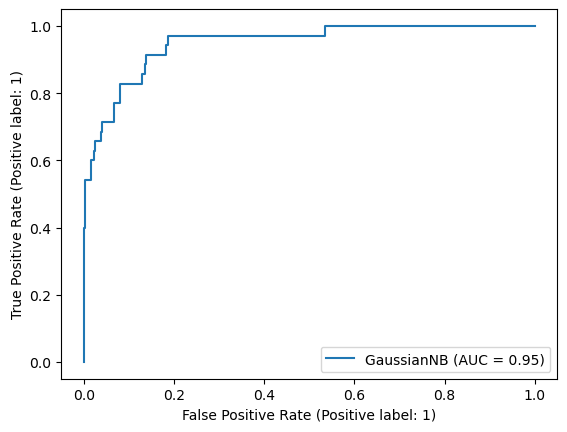

In [8]:
sns.heatmap(cm,annot=True, annot_kws={'size':10}, fmt='d')
print(accuracy_score(y_test, y_pred))

metrics.plot_roc_curve(clf2, X_test_selected, y_test)
plt.show()